In [2]:
# Standard Imports
import numpy as np
from time import time
from matplotlib import pyplot as plt

# SHAPER
from pyshaper.CommonObservables import buildCommmonObservables
from pyshaper.Observables import Observable
from pyshaper.Shaper import Shaper

# SPECTER
from spectral_emd import compute_spectral_representation, cumulative_spectral_function
from spectral_emd import ds2


# Utils
from pyshaper.utils.data_utils import load_cmsopendata
from pyshaper.utils.plot_utils import plot_event




# Necessary GPU nonsense
import torch 

if torch.cuda.is_available():  
    dev = "cuda:0" 
    print("Using GPU!")
else:  
    dev = "cpu"  
    print("Using CPU!")
device = torch.device(dev) 

Using CPU!


Max # of particles: 133
test


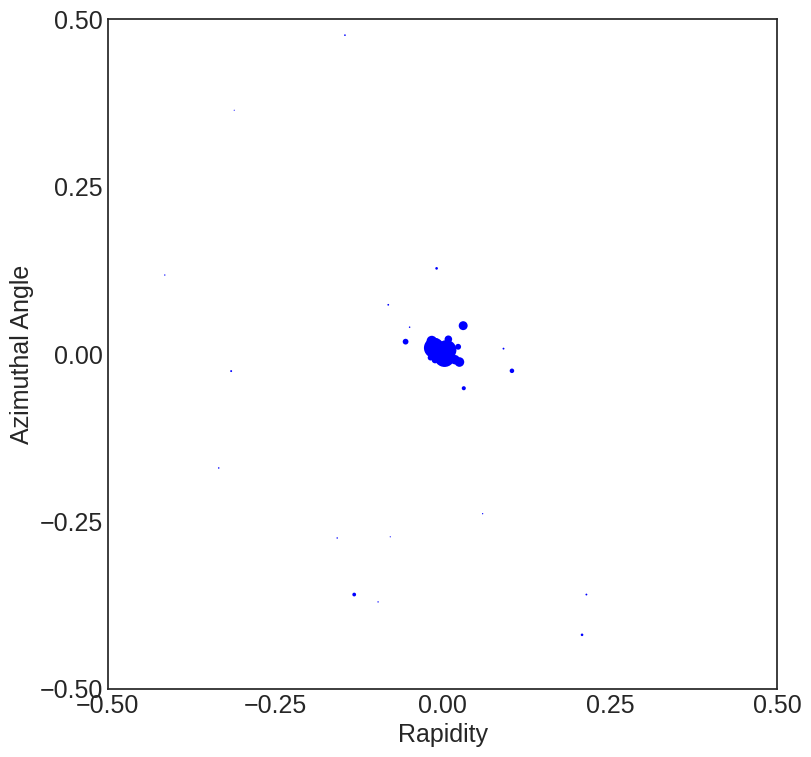

<Axes: xlabel='Rapidity', ylabel='Azimuthal Angle'>

In [2]:
# Parameters
R = 0.5
beta = 1.0
N = 500
pt_lower = 475
pt_upper = 525
eta = 1.9
quality = 2
pad = 125
plot_dir = "results"

# Load data (NOTE: Need the `energyflow` package installed for the default dataset, or provide your own data)
dataset, sim_weights, sim_factors = load_cmsopendata("~/.energyflow/", "sim", pt_lower, pt_upper, eta, quality, pad, n = N)


example_event = dataset[0]
plot_event(example_event[0], example_event[1], R, color = "blue")

In [3]:
# sEMDs
from tqdm import tqdm

sEMDs = []
s2e1e2s = []
somegas = []

for event in tqdm(dataset):

    es = np.linspace(0,0.5, 100)
    omegas = np.linspace(0,0.75, 100)
    Es, Omegas = np.meshgrid(es, omegas)
    temp = np.zeros_like(Es)


    for (i, e) in enumerate(es):
        for (j, omega) in enumerate(omegas):

            s = compute_spectral_representation(event, type = "jet")
            s2 = np.array((   (0, 1 - e), (omega, e),     ))
            d = ds2(s, s2)
            temp[j,i] = d

    arg = np.unravel_index(temp.argmin(), temp.shape)
    e = es[arg[1]]
    omega = omegas[arg[0]]

    s2e1e2s.append(e)
    somegas.append(omega)
    sEMDs.append(np.amin(temp))

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [17:37<00:00,  2.12s/it]


AttributeError: Figure.set() got an unexpected keyword argument 'color'

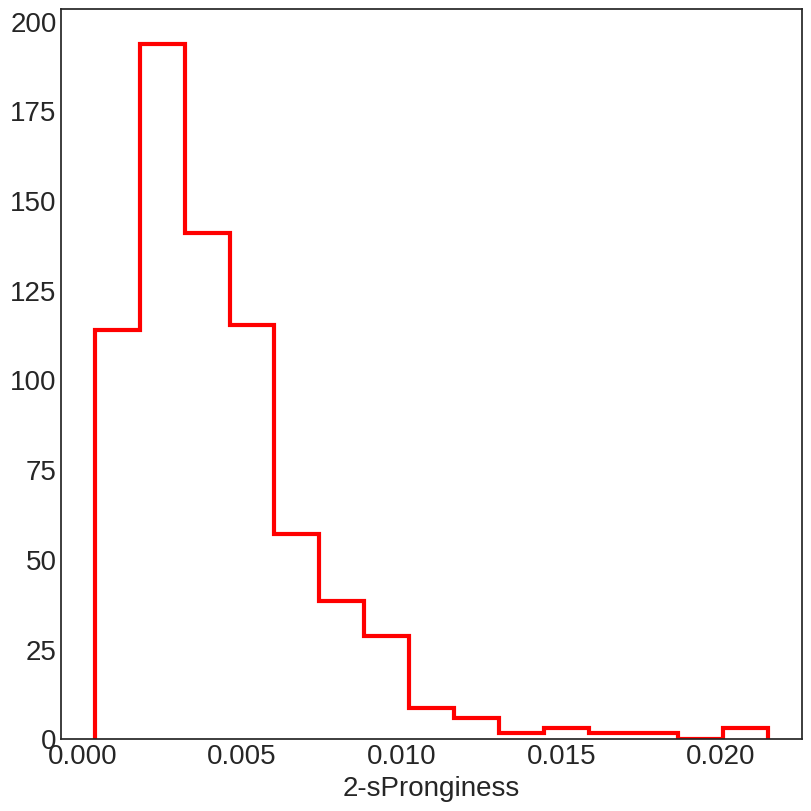

In [7]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))  

plt.hist(sEMDs, bins = 15, color = "red",histtype="step", density = "True", lw = 3)
plt.xlabel("2-sPronginess")




plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8), color = "red",histtype="step", density = "True", lw = 3)  

plt.hist(somegas, bins = 15)
plt.xlabel("2-sPronginess $\omega$")



plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))  

plt.hist(s2e1e2s, bins = 15, color = "red",histtype="step", density = "True", lw = 3)
plt.xlabel("2-sPronginess $2E_1E_2$")

In [5]:
# sEMDs
from tqdm import tqdm

sEMDs2 = []
s2e1e2s2 = []
somegas2 = []

for event in tqdm(dataset):

    es = np.linspace(0,1.0, 100)
    omegas = np.linspace(0,0.75, 100)
    Es, Omegas = np.meshgrid(es, omegas)
    temp = np.zeros_like(Es)


    for (i, e) in enumerate(es):
        for (j, omega) in enumerate(omegas):

            s = compute_spectral_representation(event, type = "jet")
            s2 = np.array((   (0, 1 - e), (omega, e),     ))
            d = ds2(s, s2)
            temp[j,i] = d

    arg = np.unravel_index(temp.argmin(), temp.shape)
    e = es[arg[1]]
    omega = omegas[arg[0]]

    s2e1e2s2.append(e)
    somegas2.append(omega)
    sEMDs2.append(np.amin(temp))

 31%|███       | 155/500 [07:04<15:44,  2.74s/it] 


KeyboardInterrupt: 

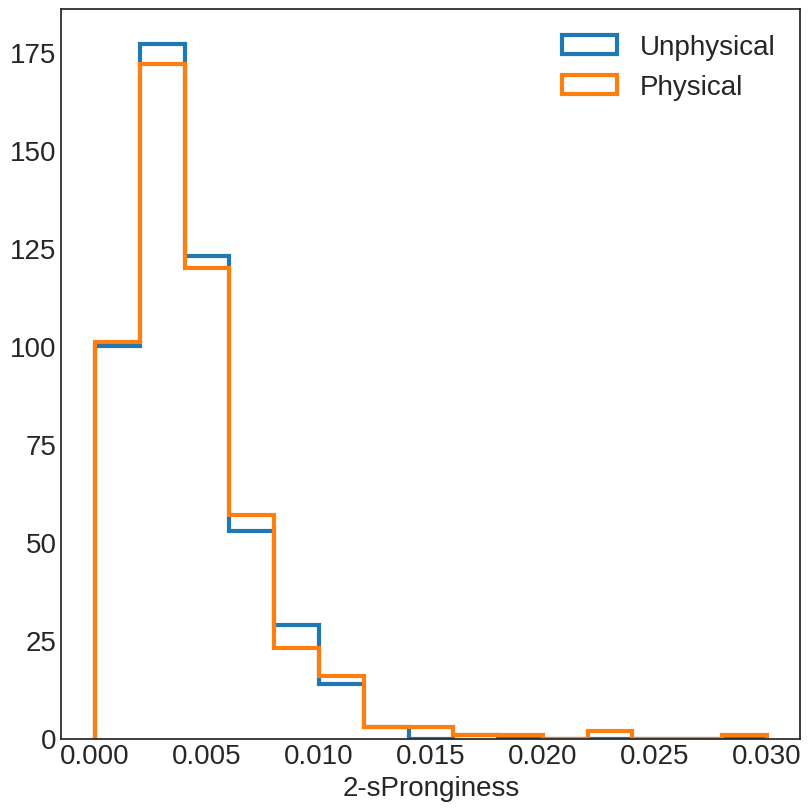

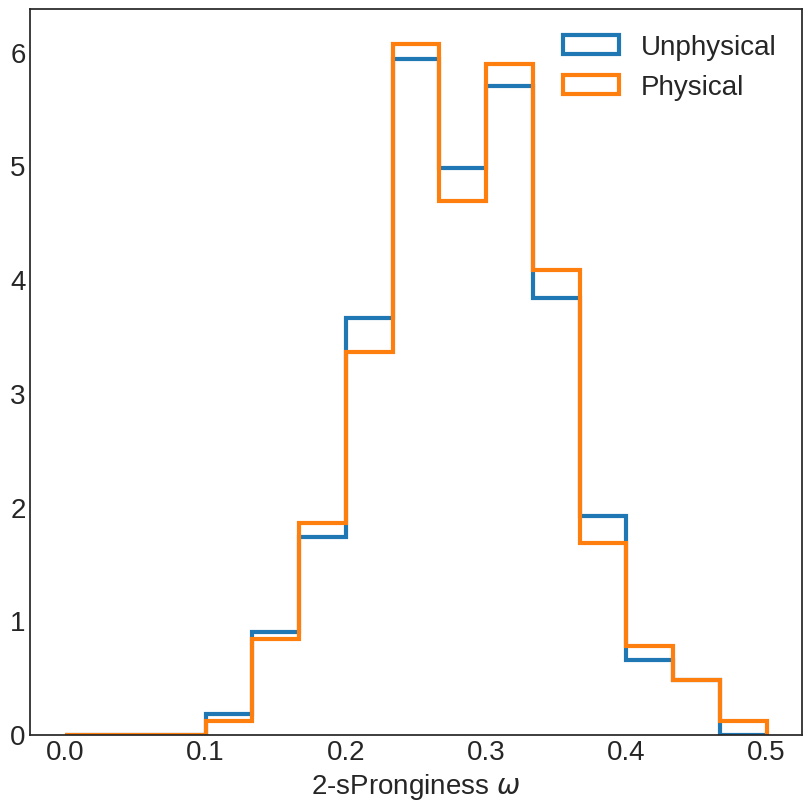

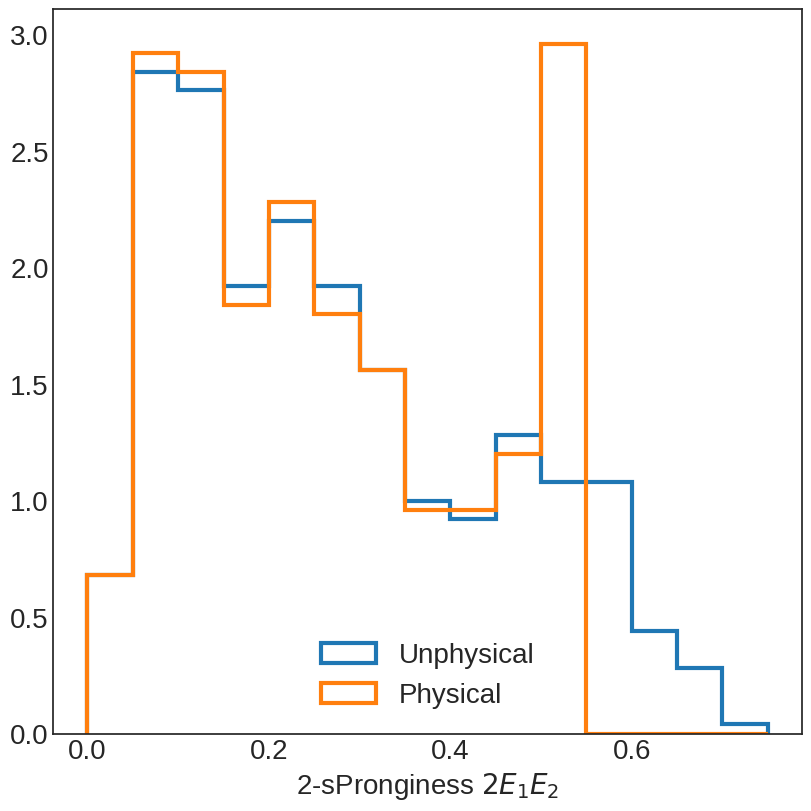

In [ ]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))  

plt.hist(sEMDs2, bins = 15, density = True, range = (0, 0.03), histtype="step", lw = 3, label = "Unphysical")
plt.hist(sEMDs, bins = 15, density = True, range = (0, 0.03), histtype="step", lw = 3, label = "Physical")
plt.xlabel("2-sPronginess")

plt.legend()


plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))  

plt.hist(somegas2, bins = 15, density = True, range = (0, 0.5), histtype="step", lw = 3, label = "Unphysical")
plt.hist(somegas, bins = 15, density = True, range = (0, 0.5), histtype="step", lw = 3, label = "Physical")
plt.xlabel("2-sPronginess $\omega$")

plt.legend()






plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))  

plt.hist(s2e1e2s2, bins = 15, density = True, range = (0, 0.75), histtype="step", lw = 3, label = "Unphysical")
plt.hist(s2e1e2s, bins = 15, density = True, range = (0, 0.75), histtype="step", lw = 3, label = "Physical")
plt.xlabel("2-sPronginess $2E_1E_2$")

plt.legend()